# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Вам нужно научиться определять рыночную стоимость объектов недвижимости. Для этого проведите исследовательский анализ данных и установите параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

* airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
* balcony — число балконов
* ceiling_height — высота потолков (м)
* cityCenters_nearest — расстояние до центра города (м)
* days_exposition — сколько дней было размещено объявление (от публикации до снятия)
* first_day_exposition — дата публикации
* floor — этаж
* floors_total — всего этажей в доме
* is_apartment — апартаменты (булев тип)
* kitchen_area — площадь кухни в квадратных метрах (м²)
* last_price — цена на момент снятия с публикации
* living_area — жилая площадь в квадратных метрах (м²)
* locality_name — название населённого пункта
* open_plan — свободная планировка (булев тип)
* parks_around3000 — число парков в радиусе 3 км
* parks_nearest — расстояние до ближайшего парка (м)
* ponds_around3000 — число водоёмов в радиусе 3 км
* ponds_nearest — расстояние до ближайшего водоёма (м)
* rooms — число комнат
* studio — квартира-студия (булев тип)
* total_area — общая площадь квартиры в квадратных метрах (м²)
* total_images — число фотографий квартиры в объявлении

### Откройте файл с данными и изучите общую информацию

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
data = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [2]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

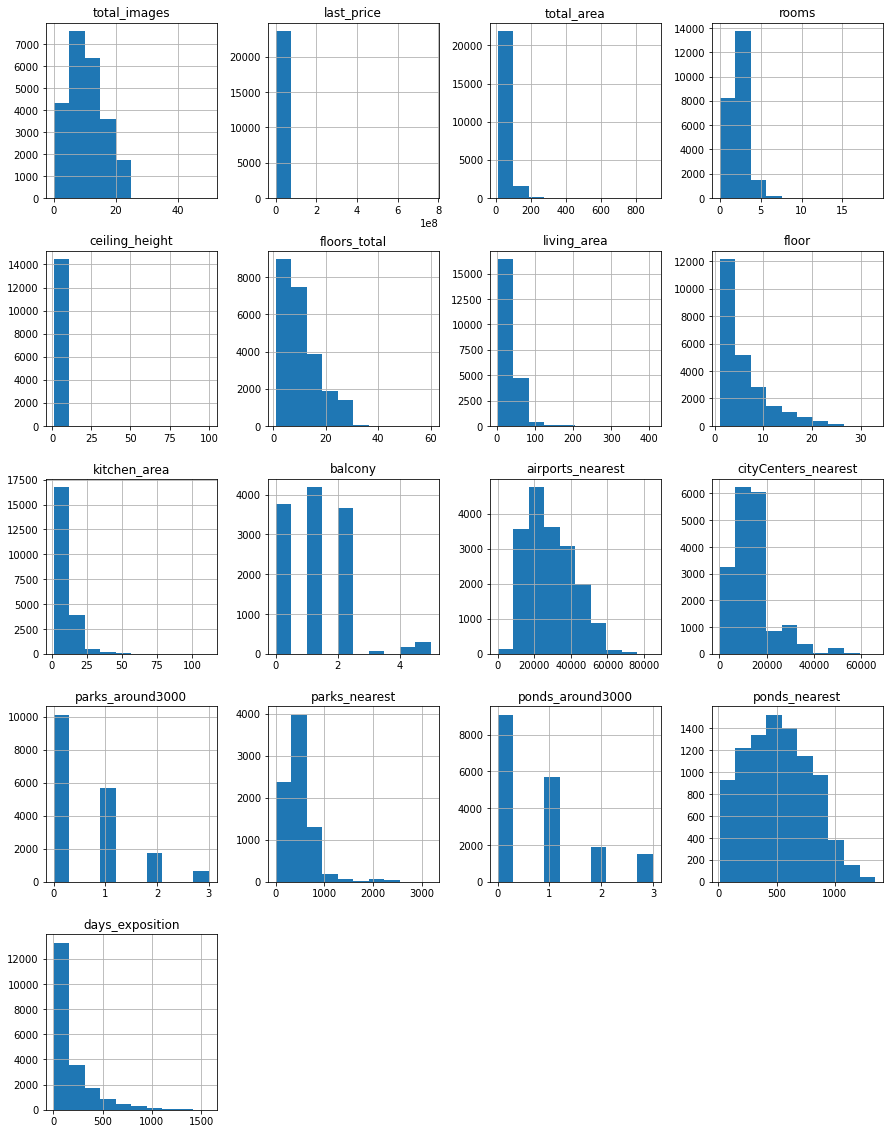

In [3]:
data.hist(figsize=(15, 20))

<b>Вывод</b>

При данных представленного датафрейма столкнулись с тем, что данные были склеены в один столбец. Это связано с тем, что в данном случае строки на стобцы разделяли не привычные нам запятые, а знаки табуляции \t. Применив метод к строке чтения файла, корректно разделили данные на столбцы и вывели информацию о данных. Ознакомились с данными и выяснили, что представлено 22 столбца, характеризующих различные данные о продаваемых в разных населенных пунктах Ленинградской области квартирах. Замечаем, что в некоторых колонках есть пропуски. Для наглядности числовых данных вывели гистограммы.

### Выполните предобработку данных

Проверим сначала датафрейм на пропущенные значения и дубликаты.

In [4]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [5]:
data.duplicated().sum()

0

Мы посмотрели и обнаружили, в каких столбцах есть пропуски. Дубликаты отсутствуют. Займемся пропусками. Начнем с тех которые проще и логичнее заменить. Например с количества болконов. Можно сделать вполне логичный вывод, что если не указано количество балконов, значит их нет. В таком случае все пропущенные значения заменяем на 0.

In [6]:
data['balcony'] = data['balcony'].fillna(0)
data['balcony'].isnull().sum()

0

Обратим внимание что самое маленькое количество пропусков находится в колонке с указанием населенного пункта, данные значения мы никак не можем заменить. Однако данных строк достаточно маленький процент, поэтому, их можно исключить из нашей таблицы.

In [7]:
data.dropna(subset=['locality_name'], inplace=True)
data['locality_name'].isnull().sum()

0

Больше пропусков имеющих возможность замены не обнаружено. Переходим к следующему виду возможных неточностей, таких, как названия населенных пунктов. Для проверки выведем уникальные значения данной колонки.

In [8]:
data['locality_name'].value_counts()

Санкт-Петербург               15721
посёлок Мурино                  522
посёлок Шушары                  440
Всеволожск                      398
Пушкин                          369
                              ...  
посёлок Форт Красная Горка        1
поселок Коробицыно                1
деревня Большая Пустомержа        1
деревня Нижние Осельки            1
деревня Меньково                  1
Name: locality_name, Length: 364, dtype: int64

Можно заметить, что слово поселок пишется в одних случаях с "е", в других с "ё", что может привести к появлению дубликатов. Заменим все ё на е и посмотрим сколько уникальных значений получилось после замены.

In [9]:
data['locality_name'].replace('ё', 'е', inplace = True, regex = True)
len(data['locality_name'].value_counts())

330

Сравнив количество значений и длину прошлого списка, можно понять что таких двояких названий было 34.

In [10]:
data['locality_name'].replace(['поселок ', 'деревня ', 'коттеджный поселок ', 'городской ', 'городского типа ', 'станции ', 'садоводческое некоммерческое товарищество ', 'при железнодорожной ', 'коттеджный ', 'село '], '', inplace = True, regex = True)
len(data['locality_name'].value_counts())

307

In [11]:
data['locality_name'].value_counts()

Санкт-Петербург    15721
Мурино               590
Кудрово              472
Шушары               440
Всеволожск           398
                   ...  
Трубников Бор          1
Котлы                  1
Пикколово              1
Каложицы               1
Жилпоселок             1
Name: locality_name, Length: 307, dtype: int64

Хочется заметить, что основная часть пропусков находится в таких столбцах как, например: расстояние до ближайшего водоема, парка (в этих столбцах мы имеем больше половины пропущенных значений), расстояние до аэропорта, до центра города и т.д. То есть это те значения, которые поступают автоматически, на основе картографических данных. Можно предположить, что при передаче информации произошел сбой, вследствии чего было получено столько пропущенных значений.

Для остальных данных достаточно сложно найти значения для заполнения пропусков, поэтому оставим их незаполненными.

<b>Типы данных в столбцах</b>

Теперь проверим соответствует ли тип данных в столбцах с их содержанием.

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23650 non-null  int64  
 1   last_price            23650 non-null  float64
 2   total_area            23650 non-null  float64
 3   first_day_exposition  23650 non-null  object 
 4   rooms                 23650 non-null  int64  
 5   ceiling_height        14490 non-null  float64
 6   floors_total          23565 non-null  float64
 7   living_area           21752 non-null  float64
 8   floor                 23650 non-null  int64  
 9   is_apartment          2760 non-null   object 
 10  studio                23650 non-null  bool   
 11  open_plan             23650 non-null  bool   
 12  kitchen_area          21381 non-null  float64
 13  balcony               23650 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Можно заметить, что в столбце first_day_exposition дата объявления представлена в типе object. Заменим на тип дат. Так будет удобно проводить вычсления с этим столбцом. Применим метод to_datetime() и проверим прошли ли изменения.

In [13]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23650 non-null  int64         
 1   last_price            23650 non-null  float64       
 2   total_area            23650 non-null  float64       
 3   first_day_exposition  23650 non-null  datetime64[ns]
 4   rooms                 23650 non-null  int64         
 5   ceiling_height        14490 non-null  float64       
 6   floors_total          23565 non-null  float64       
 7   living_area           21752 non-null  float64       
 8   floor                 23650 non-null  int64         
 9   is_apartment          2760 non-null   object        
 10  studio                23650 non-null  bool          
 11  open_plan             23650 non-null  bool          
 12  kitchen_area          21381 non-null  float64       
 13  balcony         

Так же, можно обратить внимание что количество этажей, баконов и дней размещения должны быть типа 'int', проведем те же манипуляции что и ранее с поправкой на тип данных.

In [14]:
data['floors_total'] = data['floors_total'].astype('Int64', errors= 'ignore')
data['days_exposition'] = data['days_exposition'].astype('Int64', errors= 'ignore')
data['balcony'] = data['balcony'].astype('int')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23650 non-null  int64         
 1   last_price            23650 non-null  float64       
 2   total_area            23650 non-null  float64       
 3   first_day_exposition  23650 non-null  datetime64[ns]
 4   rooms                 23650 non-null  int64         
 5   ceiling_height        14490 non-null  float64       
 6   floors_total          23565 non-null  float64       
 7   living_area           21752 non-null  float64       
 8   floor                 23650 non-null  int64         
 9   is_apartment          2760 non-null   object        
 10  studio                23650 non-null  bool          
 11  open_plan             23650 non-null  bool          
 12  kitchen_area          21381 non-null  float64       
 13  balcony         

<b>Вывод</b>

В процессе предобработки было убрано незначительное количество строк с отсутствующими значениями, проведены возможные замены отсутствующих значений, убраны неявные дубликаты, а так же изменены типы данных на верные.

### Добавьте в таблицу новые столбцы

Посчитаем цену за квадратный метр и добавим новый столбец. Разделим данные столбца last_price(млн) на столбец total_area(кв метры) и добавим новый столбец в dataframe и округлим до десятых.

In [15]:
data['price_per_meter'] = (data['last_price'] / data['total_area']).round(1)
data['price_per_meter']

0        120370.4
1         82920.8
2         92785.7
3        408176.1
4        100000.0
           ...   
23694     72490.8
23695     52542.4
23696     44091.7
23697    149511.4
23698     41795.7
Name: price_per_meter, Length: 23650, dtype: float64

Добавим в таблицу столбцы с днями недели, месяцем и годом публикации объявления. Наипишем функцию для создания нового столбца с названиями дней недели. Для этого посмотрели уникальные значения столбца с числовым обозначением дней недели. А так же вынесем в новые колонки месяц и год объявлений. И выведем первые строки результата. 

In [16]:
data['weekday_number'] = data['first_day_exposition'].dt.weekday
data['weekday_number'].value_counts()

def weekday(day):
    if day == 0:
        return "понедельник"
    if day == 1:
        return "вторник"
    if day == 2:
        return "среда"
    if day == 3:
        return "четверг"
    if day == 4:
        return "пятница"
    if day == 5:
        return "суббота"
    if day == 6:
        return "воскресенье"
  
data['weekday'] = data['weekday_number'].apply(weekday)

data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year

data.tail(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_meter,weekday_number,weekday,month,year
23689,13,3550000.0,35.30,2018-02-28,1,2.86,15.0,16.3,4,NaN,...,1.0,353.0,2.0,652.0,29.0,100566.6,2,среда,2,2018
23690,3,5500000.0,52.00,2018-07-19,2,NaN,5.0,31.0,2,NaN,...,1.0,300.0,0.0,NaN,15.0,105769.2,3,четверг,7,2018
23691,11,9470000.0,72.90,2016-10-13,2,2.75,25.0,40.3,7,NaN,...,0.0,NaN,1.0,806.0,519.0,129904.0,3,четверг,10,2016
23692,2,1350000.0,30.00,2017-07-07,1,NaN,5.0,17.5,4,NaN,...,NaN,NaN,NaN,NaN,413.0,45000.0,4,пятница,7,2017
23693,9,4600000.0,62.40,2016-08-05,3,2.60,9.0,40.0,8,NaN,...,1.0,352.0,1.0,675.0,239.0,73717.9,4,пятница,8,2016
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5.0,73.3,3,NaN,...,1.0,796.0,3.0,381.0,NaN,72490.8,1,вторник,3,2017
23695,14,3100000.0,59.00,2018-01-15,3,NaN,5.0,38.0,4,NaN,...,NaN,NaN,NaN,NaN,45.0,52542.4,0,понедельник,1,2018
23696,18,2500000.0,56.70,2018-02-11,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,NaN,NaN,NaN,44091.7,6,воскресенье,2,2018
23697,13,11475000.0,76.75,2017-03-28,2,3.00,17.0,NaN,12,NaN,...,2.0,173.0,3.0,196.0,602.0,149511.4,1,вторник,3,2017
23698,4,1350000.0,32.30,2017-07-21,1,2.50,5.0,12.3,1,NaN,...,NaN,NaN,NaN,NaN,NaN,41795.7,4,пятница,7,2017


Добавим в данные столбец с этажем квартиры (первый, последний и другой). Добавим столбцы last_floor и first_floor, в которых булевы значения отражают соответствие условию равенста певому или последнему этажу. Напишем функцию, котоая на вход будет принимать строки и возвращать название этажа по условию задачи. И выведем первые строки для проверки результата.

In [17]:
data['last_floor'] = (data['floors_total'] == data['floor'])*1
data['first_floor'] = (data['floor'] == 1)*1

def floor(row):
    if row['first_floor'] == 1:
        return 'первый этаж'
    if row['last_floor'] == 1:
        return 'последний этаж'
    return 'другой'

data['floors_number'] = data.apply(floor, axis=1)

data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,price_per_meter,weekday_number,weekday,month,year,last_floor,first_floor,floors_number
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.00,8,NaN,...,755.0,NaN,120370.4,3,четверг,3,2019,0,0,другой
1,7,3350000.0,40.40,2018-12-04,1,NaN,11.0,18.60,1,NaN,...,NaN,81.0,82920.8,1,вторник,12,2018,0,1,первый этаж
2,10,5196000.0,56.00,2015-08-20,2,NaN,5.0,34.30,4,NaN,...,574.0,558.0,92785.7,3,четверг,8,2015,0,0,другой
3,0,64900000.0,159.00,2015-07-24,3,NaN,14.0,NaN,9,NaN,...,234.0,424.0,408176.1,4,пятница,7,2015,0,0,другой
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.00,13,NaN,...,48.0,121.0,100000.0,1,вторник,6,2018,0,0,другой
5,10,2890000.0,30.40,2018-09-10,1,NaN,12.0,14.40,5,NaN,...,NaN,55.0,95065.8,0,понедельник,9,2018,0,0,другой
6,6,3700000.0,37.30,2017-11-02,1,NaN,26.0,10.60,6,NaN,...,NaN,155.0,99195.7,3,четверг,11,2017,0,0,другой
7,5,7915000.0,71.60,2019-04-18,2,NaN,24.0,NaN,22,NaN,...,NaN,NaN,110544.7,3,четверг,4,2019,0,0,другой
8,20,2900000.0,33.16,2018-05-23,1,NaN,27.0,15.43,26,NaN,...,NaN,189.0,87454.8,2,среда,5,2018,0,0,другой
9,18,5400000.0,61.00,2017-02-26,3,2.50,9.0,43.60,7,NaN,...,NaN,289.0,88524.6,6,воскресенье,2,2017,0,0,другой


Добавим столбец с расчетом отдаленности от центра в километрах.

In [18]:
data['distance_city_center_km'] = round(data['cityCenters_nearest'] / 1000)
try:
    data['distance_city_center_km'] =  round(data['distance_city_center_km'], 2).astype('Int32')
    print('Все ОК!')
except:
    print('Необходимо изменить тип int')
    
data.head()

Все ОК!


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,price_per_meter,weekday_number,weekday,month,year,last_floor,first_floor,floors_number,distance_city_center_km
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,NaN,...,NaN,120370.4,3,четверг,3,2019,0,0,другой,16
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,NaN,...,81.0,82920.8,1,вторник,12,2018,0,1,первый этаж,19
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,NaN,...,558.0,92785.7,3,четверг,8,2015,0,0,другой,14
3,0,64900000.0,159.0,2015-07-24,3,NaN,14.0,NaN,9,NaN,...,424.0,408176.1,4,пятница,7,2015,0,0,другой,7
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,NaN,...,121.0,100000.0,1,вторник,6,2018,0,0,другой,8


### Проведите исследовательский анализ данных

#### Теперь проанализируем отфильтрованные данные.

<b>Изучим данные по площади квартир.</b>

Построим гистограмму для площади квартир. И посмотрим на выводы:

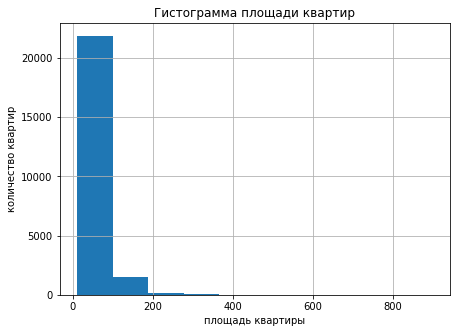

In [19]:
data['total_area'].hist(figsize=(7,5))
plt.title('Гистограмма площади квартир')
plt.xlabel('площадь квартиры')
plt.ylabel('количество квартир')
plt.show()

 Видим, что основная масса значений сосредоточена в самом начале, в диапазоне от 0 до 200 кв метров. Есть выбросы и более высокие, более 800. Посмотрим на значения более детально. Рассмотри гистограмму с диапазоном 0-200.

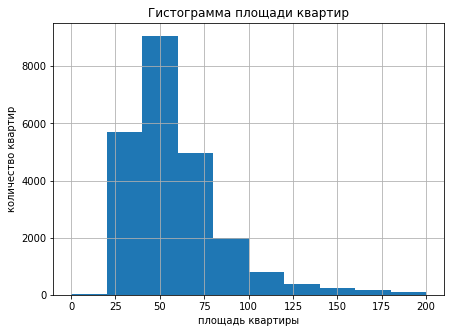

In [20]:
data['total_area'].hist(range=(0, 200), figsize=(7,5))
plt.title('Гистограмма площади квартир')
plt.xlabel('площадь квартиры')
plt.ylabel('количество квартир')
plt.show()

In [21]:
data['total_area'].describe()

count    23650.000000
mean        60.329069
std         35.661808
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

Посмотрев на определенные статистические данные столбца, можно заметить, что основная масса значений (75 процентов) квартир имеют площадь до 70 квадратных метров. Есть очень большие значения до 900 квадратных метров. Минимальное значение 12 квадратных метров.

<b>Теперь посмотрим на жилую площадь представленных квартир.</b>

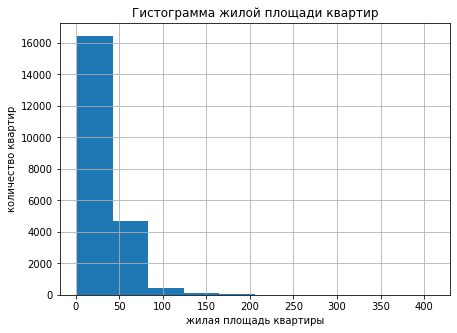

In [22]:
data['living_area'].hist(figsize=(7,5))
plt.title('Гистограмма жилой площади квартир')
plt.xlabel('жилая площадь квартиры')
plt.ylabel('количество квартир')
plt.show()

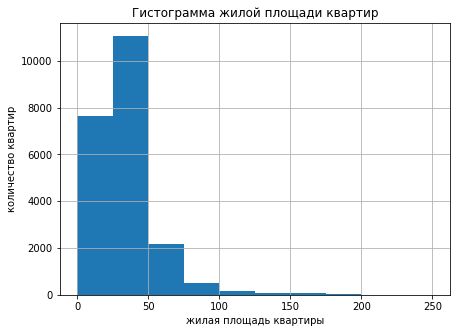

In [23]:
data['living_area'].hist(range=(0, 250), figsize=(7,5))
plt.title('Гистограмма жилой площади квартир')
plt.xlabel('жилая площадь квартиры')
plt.ylabel('количество квартир')
plt.show()

In [24]:
data['living_area'].describe()

count    21752.000000
mean        34.448356
std         22.037664
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

Посмотрев на статистические данные столбца, можно заметить, что основная масса значений (75 процентов) квартир имеют площадь до 50 квадратных метров. Есть очень большие значения до 200 квадратных метров. Минимальное значение 2 квадратных метров.

<b>Теперь посмотрим на жилую площадь представленных квартир.</b>

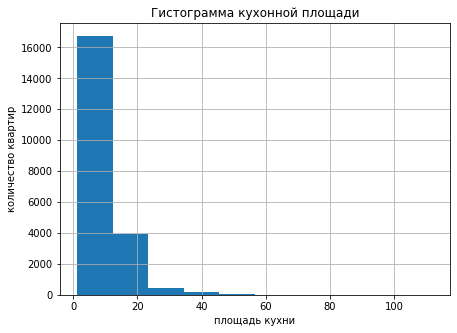

In [25]:
data['kitchen_area'].hist(figsize=(7,5))
plt.title('Гистограмма кухонной площади')
plt.xlabel('площадь кухни')
plt.ylabel('количество квартир')
plt.show()

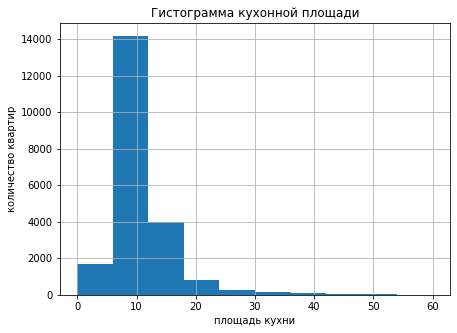

In [26]:
data['kitchen_area'].hist(range=(0, 60), figsize=(7,5))
plt.title('Гистограмма кухонной площади')
plt.xlabel('площадь кухни')
plt.ylabel('количество квартир')
plt.show()

In [27]:
data['kitchen_area'].describe()

count    21381.000000
mean        10.566403
std          5.901753
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

Глядя на статистические данные, можно заметить, что основная масса (75 процентов) квартир имеют площадь кухни до 12 квадратных метров. Есть очень большие значения до 112 квадратных метров. Минимальное значение 1,3 квадратных метров.

<b>Изучим данные по стоимости квартир.</b>

Построим гистограмму и посмотрим на выводы:

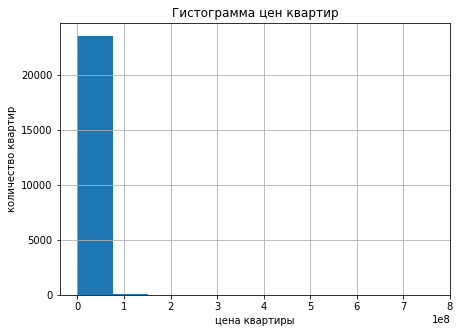

In [28]:
data['last_price'].hist(figsize=(7,5))
plt.title('Гистограмма цен квартир')
plt.xlabel('цена квартиры')
plt.ylabel('количество квартир')
plt.show()

In [29]:
data['last_price'].describe().apply(lambda x: format(x, 'f'))

count        23650.000000
mean       6541126.897928
std       10896399.175038
min          12190.000000
25%        3400000.000000
50%        4650000.000000
75%        6799000.000000
max      763000000.000000
Name: last_price, dtype: object

Видим высокое стандартное отклонение, что говорит о больших выбросах отдельных значений столбца. Основная часть цен расположена в диапазоне до 7 миллионов. Рассммотрим данные в этом диапазоне.

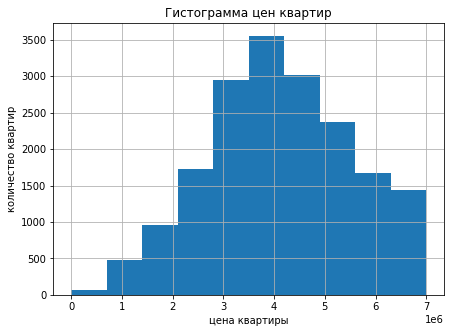

In [30]:
data['last_price'].hist(range=(0,7000000), figsize=(7,5))
plt.title('Гистограмма цен квартир')
plt.xlabel('цена квартиры')
plt.ylabel('количество квартир')
plt.show()

Наиболее распространены цены на квартиры в диапазоне от 3 до 5 миллионов.

<b>Изучим данные по количеству комнат.</b>

Построим гистограмму и посмотрим на выводы:

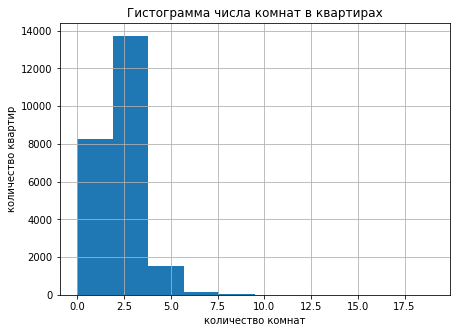

In [31]:
data['rooms'].hist(figsize=(7,5))
plt.title('Гистограмма числа комнат в квартирах')
plt.xlabel('количество комнат')
plt.ylabel('количество квартир')
plt.show()

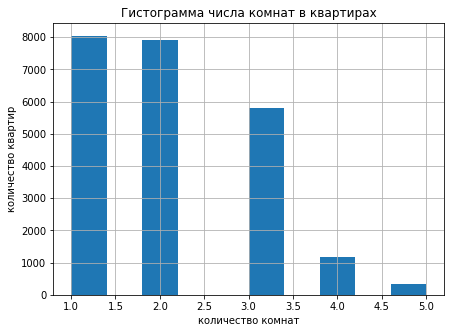

In [32]:
data['rooms'].hist(range=(1, 5), figsize=(7,5))
plt.title('Гистограмма числа комнат в квартирах')
plt.xlabel('количество комнат')
plt.ylabel('количество квартир')
plt.show()

In [33]:
len(data[data['rooms'] > 5])

195

Исходя из графика видим, что наибольшая часть квратир имеет до 3 комнат, что в принципе вполне реалистично. А вот максимальное число 19 комнат немного настораживает, действительно ли эта правда. Или в данных ошибка. Квартир, в которых комнат больше пяти всего 195.

<b>Изучим данные по высоте потолков в квартирах.</b>

Построим гистограмму и посмотрим на выводы:

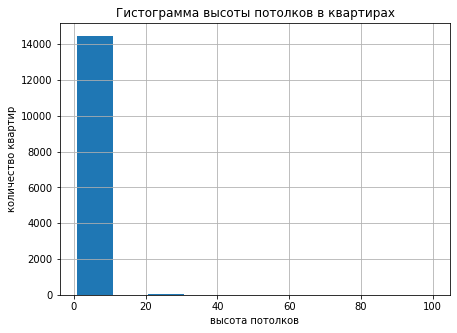

In [34]:
data['ceiling_height'].hist(figsize=(7,5))
plt.title('Гистограмма высоты потолков в квартирах')
plt.xlabel('высота потолков')
plt.ylabel('количество квартир')
plt.show()

Из графика видим, что основная часть значений несильно друг от друга отличается. Но есть также значения очень высокие, до 100 метров, что скорее всего является ошибкой. Посмотрим сколько таких аномально больших значений представлено в таблице.

In [35]:
data['ceiling_height'].describe()

count    14490.000000
mean         2.771287
std          1.261593
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

Судя по срезу значений, средней высотой считается 2,65 метров. А значит аномально большие значения не оказывают большого влияния на данные. Однако так же есть минимальное значение в 1 метр, в такой квартире человек бы жить не смог, а значит в данных скорее всего ошибка. Однако так как средняя высота не выходит за рамки нормы мы можем предположить что это скорее всего единичные случаи и на общие данные они влияют не сильно. Построим гистограмму с более узкой выборкой. 

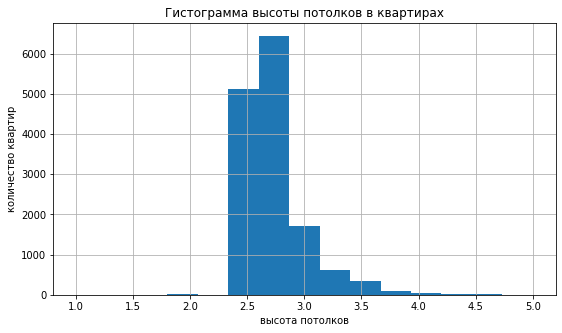

In [36]:
data['ceiling_height'].hist(bins=15, range=(1,5), figsize=(9,5))
plt.title('Гистограмма высоты потолков в квартирах')
plt.xlabel('высота потолков')
plt.ylabel('количество квартир')
plt.show()

<b>Изучим данные по типу этажей.</b>

Построим гистограмму и посмотрим на выводы:

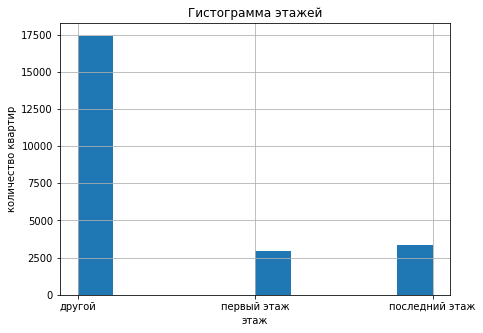

In [37]:
data['floors_number'].hist(figsize=(7,5))
plt.title('Гистограмма этажей')
plt.xlabel('этаж')
plt.ylabel('количество квартир')
plt.show()

Смотря на график можем сделать вывод что меньше всего квартир продается на первом этаже. Чуть больше на последнем. И самые частовстречающиеся квартиры находятся на других этажах.

<b>Изучим данные по общей этажности домов.</b>

Построим гистограмму и посмотрим на выводы:

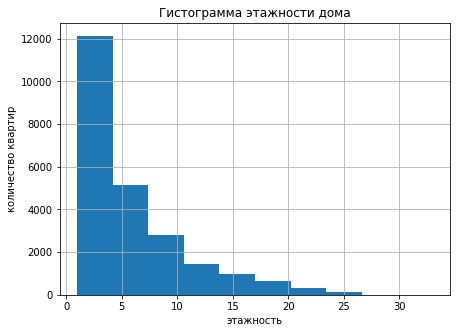

In [38]:
data['floor'].hist(figsize=(7,5))
plt.title('Гистограмма этажности дома')
plt.xlabel('этажность')
plt.ylabel('количество квартир')
plt.show()

In [39]:
data['floor'].describe()

count    23650.000000
mean         5.893277
std          4.883317
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

Судя по гистограмме самое большое количество квартир продается в домах с количеством этажей до 5. Таких квартир более 12 000. Посмотрим на гистограмму с более узкой выборкой.

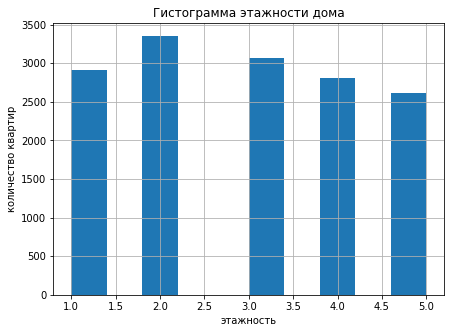

In [40]:
data['floor'].hist(range=(1, 5), figsize=(7,5))
plt.title('Гистограмма этажности дома')
plt.xlabel('этажность')
plt.ylabel('количество квартир')
plt.show()

<b>Изучим данные по расстоянию до центра города(м).</b>

Построим гистограмму и посмотри на выводы:

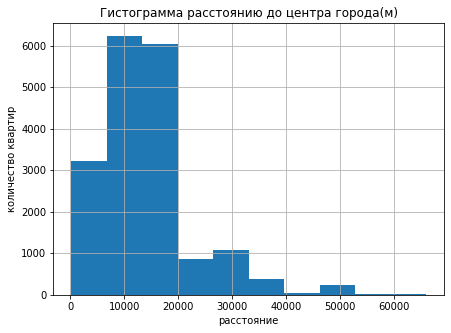

In [41]:
data['cityCenters_nearest'].hist(figsize=(7,5))
plt.title('Гистограмма расстоянию до центра города(м)')
plt.xlabel('расстояние')
plt.ylabel('количество квартир')
plt.show()

Судя по графику, больше всего квартир приходится на 20 000 м от центра. Посмотрим на более узкий срез.

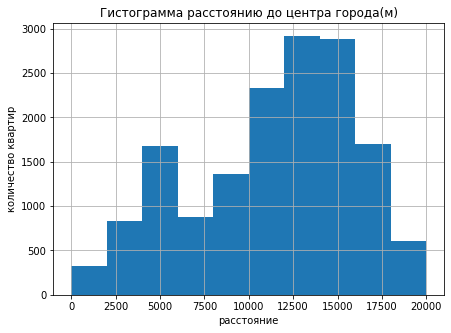

In [42]:
data['cityCenters_nearest'].hist(range=(1, 20000), figsize=(7,5))
plt.title('Гистограмма расстоянию до центра города(м)')
plt.xlabel('расстояние')
plt.ylabel('количество квартир')
plt.show()

Глядя на график можно сделать вывод что чем ближе к цетру тем меньше квартир продается. Так например в пределах 2000м (2км) квартир продается меньше 500.

<b>Изучим данные по расстоянию до ближайшего парка.</b>

Построим гистограмму и посмотри на выводы:

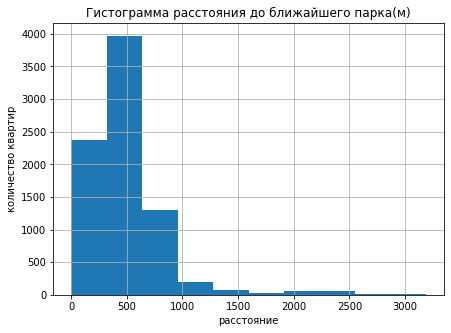

In [43]:
data['parks_nearest'].hist(figsize=(7,5))
plt.title('Гистограмма расстояния до ближайшего парка(м)')
plt.xlabel('расстояние')
plt.ylabel('количество квартир')
plt.show()

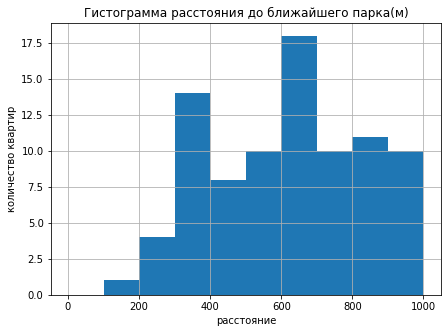

In [44]:
data['cityCenters_nearest'].hist(range=(1, 1000), figsize=(7,5))
plt.title('Гистограмма расстояния до ближайшего парка(м)')
plt.xlabel('расстояние')
plt.ylabel('количество квартир')
plt.show()

Глядя на график можно сделать вывод что квартиры ближе 100 метров от парка не продаются. Однако самое большое количество квартир продается в отдаленности от парка от 300 до 400 метров и от 600 до 700 метров.

# Посмотрим как быстро квартиры продавались

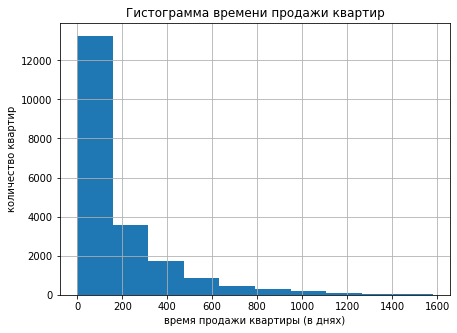

In [45]:
data['days_exposition'].hist(figsize=(7,5))
plt.title('Гистограмма времени продажи квартир')
plt.xlabel('время продажи квартиры (в днях)')
plt.ylabel('количество квартир')
plt.show()

In [46]:
data['days_exposition'].describe()

count    20470.000000
mean       180.753200
std        219.777916
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

Судя по описанию, основная масса квартир продается за время до 200 дней, что составляют чуть более полугода. Наблюдаем также аномально высокие значения 1580 дней, что составляет больше четырех лет. Можно сказать, что продажи проходят быстро, когда квартира продается в течение полугода после создания объявления.

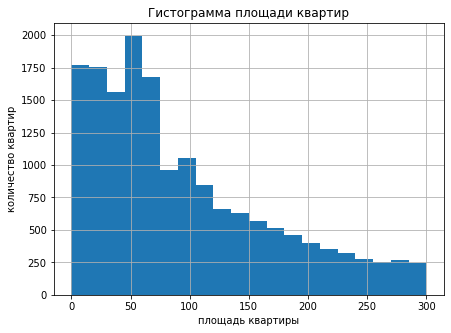

In [47]:
data['days_exposition'].hist(figsize=(7,5), range=(0, 300), bins=20)
plt.title('Гистограмма площади квартир')
plt.xlabel('площадь квартиры')
plt.ylabel('количество квартир')
plt.show()

# Убираем все редкие и аномальные значения.

Посмотрим на значения столбца с ценой квартир и уберем наиболее редкие и выбивающиеся значения.

In [48]:
data['last_price'].describe().apply(lambda x: format(x, 'f'))

count        23650.000000
mean       6541126.897928
std       10896399.175038
min          12190.000000
25%        3400000.000000
50%        4650000.000000
75%        6799000.000000
max      763000000.000000
Name: last_price, dtype: object

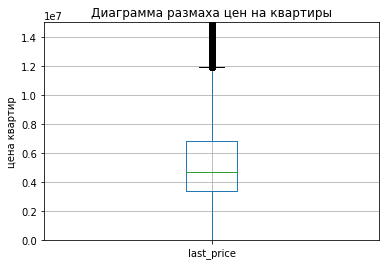

In [49]:
data.boxplot('last_price')
plt.ylim(0,15000000)
plt.title('Диаграмма размаха цен на квартиры')
plt.ylabel('цена квартир')
plt.show()

По графику видим, что основные значения не превышают 12 миллионов. Отфильтруем данные и оставим только те значения, которые не превышают этого числа. Проверим полученные данные.

In [50]:
data['filt_price'] = ((data['last_price'] < 12000000) & (data['last_price'] > 0))*1

Посмотрим на данные о количестве комнат и уберем аномально высокие.

In [51]:
data['rooms'].describe()


count    23650.000000
mean         2.070106
std          1.078620
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

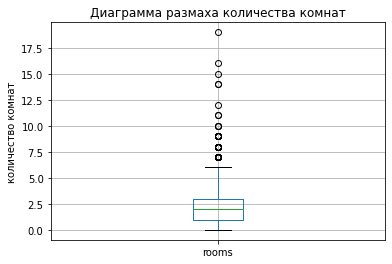

In [52]:
data.boxplot('rooms')
plt.title('Диаграмма размаха количества комнат')
plt.ylabel('количество комнат')
plt.show()

In [53]:
len(data[data['rooms'] > 6])

90

Значения комнат больше 6 являются единичными. Таких квартир всего 90. Уберем строки с этими данными.

In [54]:
data['filt_rooms'] = ((data['rooms'] <= 6) & (data['rooms'] > 0)) *1

Посмотрим на значения о высоте потолков.

In [55]:
data['ceiling_height'].describe()

count    14490.000000
mean         2.771287
std          1.261593
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

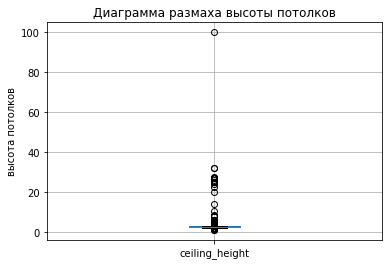

In [56]:
data.boxplot('ceiling_height')
plt.title('Диаграмма размаха высоты потолков')
plt.ylabel('высота потолков')
plt.show()

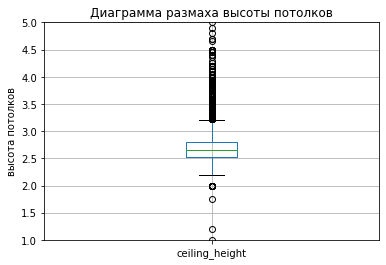

In [57]:
data.boxplot('ceiling_height')
plt.ylim(1,5)
plt.title('Диаграмма размаха высоты потолков')
plt.ylabel('высота потолков')
plt.show()

В столбце по высоте потолков оставляем только значения больше двух метров и не превышающие 3 метров.

In [58]:
data['filt_ceiling'] = ((data['ceiling_height'] >= 2) & (data['ceiling_height'] <= 4))*1 

Посмотрим на данные о площади квартир.

In [59]:
data['total_area'].describe()

count    23650.000000
mean        60.329069
std         35.661808
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

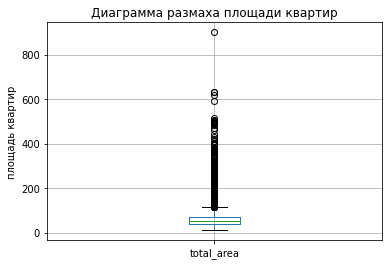

In [60]:
data.boxplot('total_area')
plt.title('Диаграмма размаха площади квартир')
plt.ylabel('площадь квартир')
plt.show()

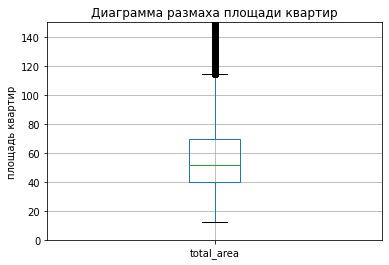

In [61]:
data.boxplot('total_area')
plt.ylim(0,150)
plt.title('Диаграмма размаха площади квартир')
plt.ylabel('площадь квартир')
plt.show()

Отфильтруем значения площади квартир, оставив квартиры, площадь которых больше 10 и не превышает 120 квадратных метров.

In [62]:
data['filt_area'] = ((data['total_area'] < 120) & (data['total_area'] > 10))*1

Теперь посмотрим и отфильтруем отдаленность от центра.

In [63]:
data['cityCenters_nearest'].describe()

count    18139.000000
mean     14197.860742
std       8606.830295
min        181.000000
25%       9241.000000
50%      13105.000000
75%      16293.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

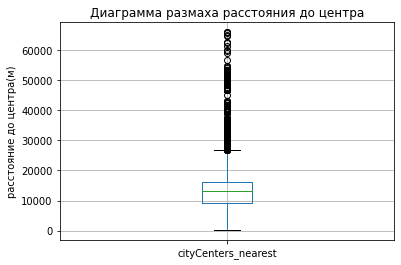

In [64]:
data.boxplot('cityCenters_nearest')
plt.title('Диаграмма размаха расстояния до центра')
plt.ylabel('расстояние до центра(м)')
plt.show()

Уберем значения больше 30000.

In [65]:
data['filt_center'] = (data['cityCenters_nearest'] < 30000)*1

Теперь создадим переменную, которая будет содержать только те строки, которые соответствуют отфильтрованным значениям.

In [66]:
good_data = data.query('filt_price >= 1 or filt_rooms >= 1 and filt_area >= 1 and filt_ceiling >= 1 and filt_center >= 1')

In [67]:
len(good_data) / len(data) 

0.9446511627906977

# Какие факторы больше всего влияют на стоимость квартиры?

Посмотрим как влияет на стоимость квартир их площадь.

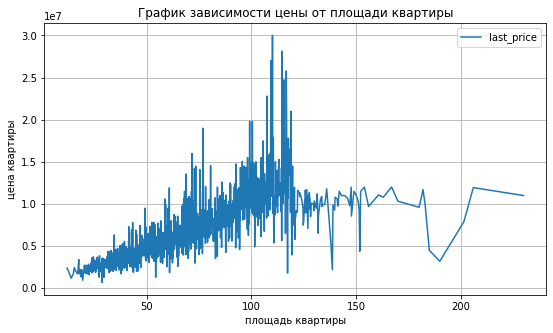

In [68]:
good_data.pivot_table(index='total_area', values='last_price', aggfunc='median').plot(grid=True, figsize=(9,5))
plt.title('График зависимости цены от площади квартиры')
plt.xlabel('площадь квартиры')
plt.ylabel('цена квартиры')
plt.show()

In [69]:
good_data['total_area'].corr(data['last_price'])

0.6860492066216239

Корреляция площади и цены квартир равна 0,79, что показывает достаточно сильную прямую зависимость между параметрами.

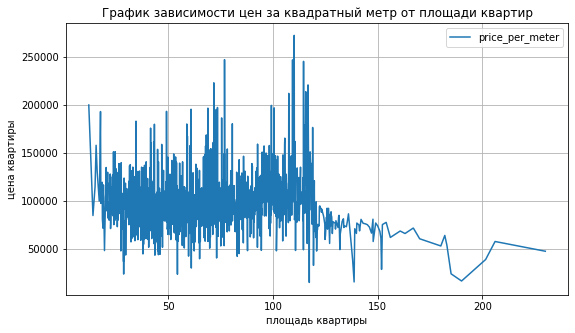

In [70]:
good_data.pivot_table(index='total_area', values='price_per_meter', aggfunc='median').plot(grid=True, figsize=(9,5))
plt.title('График зависимости цен за квадратный метр от площади квартир')
plt.xlabel('площадь квартиры')
plt.ylabel('цена квартиры')
plt.show()

In [71]:
good_data['total_area'].corr(data['price_per_meter'])

0.05374003751089465

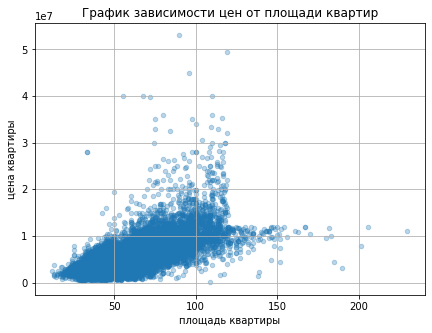

In [72]:
good_data.plot(kind='scatter', x='total_area', y = 'last_price', alpha=0.3, grid=True, figsize=(7,5))
plt.title('График зависимости цен от площади квартир')
plt.xlabel('площадь квартиры')
plt.ylabel('цена квартиры')
plt.show()

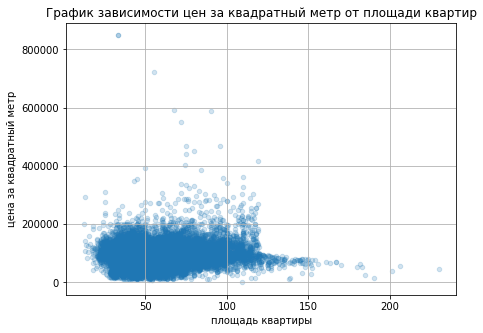

In [73]:
good_data.plot(kind='scatter', x='total_area', y = 'price_per_meter', figsize=(7,5), alpha=0.2, grid=True)
plt.title('График зависимости цен за квадратный метр от площади квартир')
plt.xlabel('площадь квартиры')
plt.ylabel('цена за квадратный метр')
plt.show()

На графиках типа scatter видна зависимость площади и полной стоимости за квартиру, так и от стоимости за квадратный метр. Но в первом случае отчетливо видна прямая зависимость. При увеличении площади увеличивается полная стоимость. Но наблюдается уменьше цены за квадратны метр. Хочется также заметить, что на втором графике максимальные выбросы по данным о цене за кв. метр наблюдаются при меньших значениях площади, что говорит об обратной зависимости.

Если сравнивать площадь и полную стоимость квартиры, замечаем, что чем больше площадь, тем боьше стоимость, что вполне понятно. Но если сравнивать цену за квадратный метр, то здесь зависимость обратно пропорциональна. Чем больше квартира по площади, тем дешевле стоит квадратный метр.

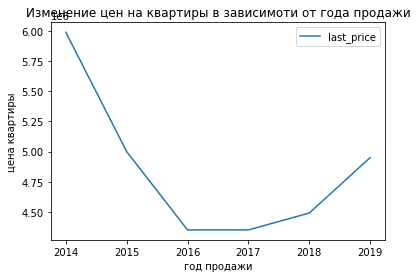

In [74]:
good_data.pivot_table(index='year', values='last_price', aggfunc='median').plot()
plt.title('Изменение цен на квартиры в зависимоти от года продажи')
plt.xlabel('год продажи')
plt.ylabel('цена квартиры')
plt.show()

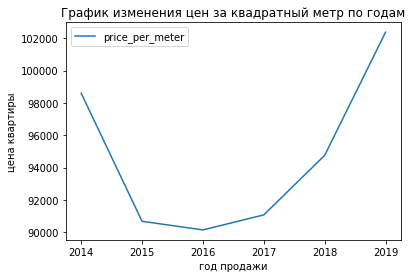

In [75]:
good_data.pivot_table(index='year', values='price_per_meter', aggfunc='median').plot()
plt.title('График изменения цен за квадратный метр по годам')
plt.xlabel('год продажи')
plt.ylabel('цена квартиры')
plt.show()

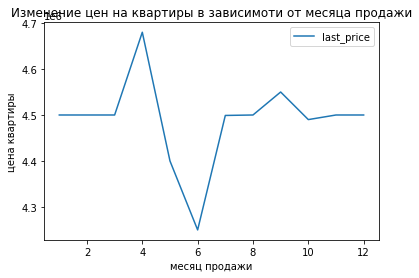

In [76]:
good_data.pivot_table(index='month', values='last_price', aggfunc='median').plot()
plt.title('Изменение цен на квартиры в зависимоти от месяца продажи')
plt.xlabel('месяц продажи')
plt.ylabel('цена квартиры')
plt.show()

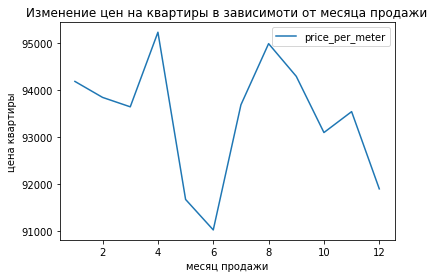

In [77]:
good_data.pivot_table(index='month', values='price_per_meter', aggfunc='median').plot()
plt.title('Изменение цен на квартиры в зависимоти от месяца продажи')
plt.xlabel('месяц продажи')
plt.ylabel('цена квартиры')
plt.show()

Рассматривая месяц и год публикации объявления о продаже квартиры, замечаем, что стоимость квартир, продаваемых в 2015 году была выше среднего. А вот стоимость квадратного метра с 2017 года растет.

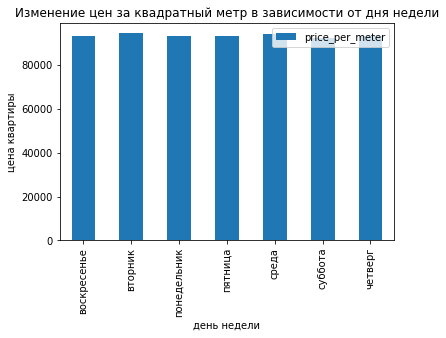

In [78]:
good_data.pivot_table(index= 'weekday', values='price_per_meter', aggfunc='median').plot(kind='bar')
plt.title('Изменение цен за квадратный метр в зависимости от дня недели')
plt.xlabel('день недели')
plt.ylabel('цена квартиры')
plt.show()

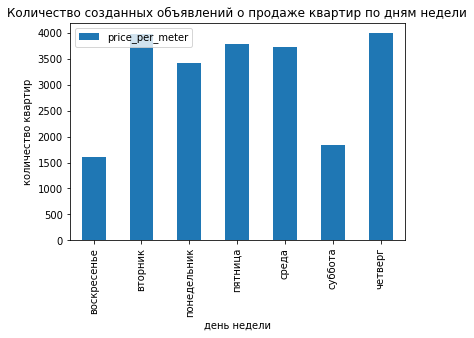

In [79]:
good_data.pivot_table(index= 'weekday', values='price_per_meter', aggfunc='count').plot(kind='bar')
plt.title('Количество созданных объявлений о продаже квартир по дням недели')
plt.xlabel('день недели')
plt.ylabel('количество квартир')
plt.show()

При изучении зависимости дня недели и стоимости квадратного метра, можно сделать следующие выводы. День недели на стоимость квадратного метра не влияет. А вот количество объявлений чаще всего выкладываются в рабочие дни(будни).

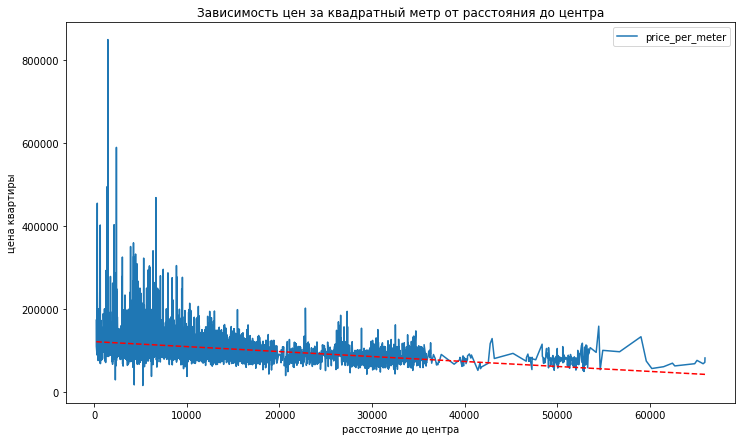

In [80]:
to_plot= good_data.pivot_table(index='cityCenters_nearest', values='price_per_meter', aggfunc='median')
to_plot.plot(figsize=(12,7))
plt.title('Зависимость цен за квадратный метр от расстояния до центра')
plt.xlabel('расстояние до центра')
plt.ylabel('цена квартиры')
x=to_plot.index
y=to_plot['price_per_meter']
z=np.polyfit(x,y,1)
p=np.poly1d(z)
plt.plot(x,p(x),'r--') 
plt.show()

Заметен тренд к снижению стоимости по мере удаления от центра/

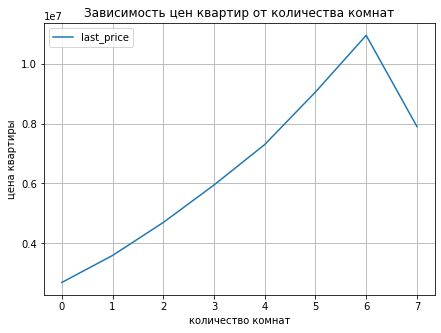

In [81]:
good_data.pivot_table(index='rooms', values='last_price', aggfunc=('median')).plot(grid=True, figsize=(7,5))
plt.title('Зависимость цен квартир от количества комнат')
plt.xlabel('количество комнат')
plt.ylabel('цена квартиры')
plt.show()

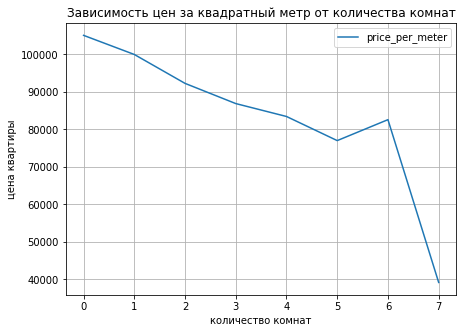

In [82]:
good_data.pivot_table(index='rooms', values='price_per_meter', aggfunc=('median')).plot(grid=True, figsize=(7,5))
plt.title('Зависимость цен за квадратный метр от количества комнат')
plt.xlabel('количество комнат')
plt.ylabel('цена квартиры')
plt.show()

При сравнении количества комнат и цены, наблюдаем ту же зависимость, что и при сравнении общей площади квартир. Чем больше комнат, тем больше общая стоимость, но меьше цена за квадратный метр.

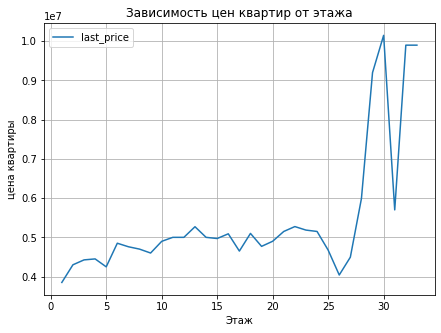

In [83]:
good_data.pivot_table(index='floor', values='last_price', aggfunc=('median')).plot(grid=True, figsize=(7,5))
plt.title('Зависимость цен квартир от этажа')
plt.xlabel('Этаж')
plt.ylabel('цена квартиры')
plt.show()

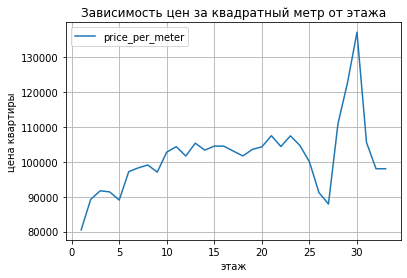

In [84]:
good_data.pivot_table(index='floor', values='price_per_meter', aggfunc=('median')).plot(grid=True)
plt.title('Зависимость цен за квадратный метр от этажа')
plt.xlabel('этаж')
plt.ylabel('цена квартиры')
plt.show()

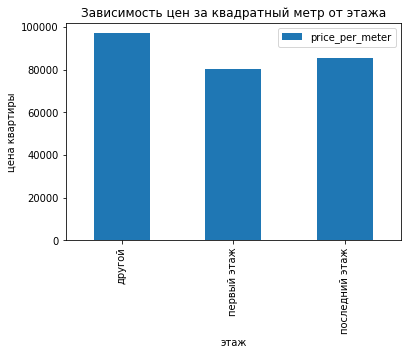

In [85]:
good_data.pivot_table(index='floors_number', values='price_per_meter', aggfunc=('median')).plot(kind='bar')
plt.title('Зависимость цен за квадратный метр от этажа')
plt.xlabel('этаж')
plt.ylabel('цена квартиры')
plt.show()

В данном случае деление всех этажей на три группы плохо показывает зависимость этажа на стоимость квартир. А вот на графиках выше видно, что на более высоких этажах расположены наиболее дорогие квартиры.

In [86]:
good_data.corr()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,studio,open_plan,...,month,year,last_floor,first_floor,distance_city_center_km,filt_price,filt_rooms,filt_ceiling,filt_area,filt_center
total_images,1.000000,0.163019,0.115730,0.088164,0.003544,0.013456,0.098301,0.030991,-0.029456,-0.023313,...,0.004029,0.148393,0.000143,-0.036009,-0.041174,-0.077590,0.032561,0.106985,0.004428,0.056842
last_price,0.163019,1.000000,0.686049,0.412108,0.103204,0.125516,0.570386,0.095330,-0.058540,-0.037606,...,-0.003662,0.000626,-0.053951,-0.116266,-0.339875,-0.634856,0.068387,0.149481,-0.111538,0.409878
total_area,0.115730,0.686049,1.000000,0.794773,0.096304,-0.037615,0.911107,-0.032130,-0.109315,-0.065167,...,0.004668,-0.064874,0.015582,-0.022349,-0.174218,-0.343124,0.122449,0.096462,-0.316985,0.126561
rooms,0.088164,0.412108,0.794773,1.000000,0.035197,-0.229134,0.882784,-0.170525,-0.167016,-0.101306,...,-0.003616,-0.039995,0.048286,0.053965,-0.105122,-0.158981,0.196351,0.092019,-0.191960,0.063241
ceiling_height,0.003544,0.103204,0.096304,0.035197,1.000000,-0.018954,0.083392,-0.008755,0.004009,0.057268,...,-0.003619,-0.011709,0.007039,-0.015542,-0.104070,-0.056058,-0.027568,-0.695670,-0.029511,0.026330
floors_total,0.013456,0.125516,-0.037615,-0.229134,-0.018954,1.000000,-0.178046,0.676614,0.071356,0.052410,...,0.015407,0.004045,-0.221812,-0.221732,-0.007074,-0.007173,-0.086806,-0.095866,0.049475,0.211812
living_area,0.098301,0.570386,0.911107,0.882784,0.083392,-0.178046,1.000000,-0.133599,-0.073201,-0.041755,...,-0.004152,-0.053999,0.049476,0.021004,-0.163476,-0.268641,0.084543,0.106582,-0.275734,0.100509
floor,0.030991,0.095330,-0.032130,-0.170525,-0.008755,0.676614,-0.133599,1.000000,0.038270,0.037304,...,0.016598,0.006289,0.099073,-0.380526,-0.000533,-0.017881,-0.051546,-0.068620,0.034947,0.138650
studio,-0.029456,-0.058540,-0.109315,-0.167016,0.004009,0.071356,-0.073201,0.038270,1.000000,-0.004411,...,0.000377,0.011159,-0.021667,-0.006247,-0.011313,0.014524,-0.802939,-0.018287,0.006462,-0.014470
open_plan,-0.023313,-0.037606,-0.065167,-0.101306,0.057268,0.052410,-0.041755,0.037304,-0.004411,1.000000,...,0.027457,-0.022863,-0.009708,-0.010595,-0.004368,0.004787,-0.511798,-0.046161,0.004274,-0.020354


Таблица наглядно демонстрирует наличие прямой или обратной зависимости между различными параметрами. Если значения отрицательные, значит данные имеют обратнопропорциональную зависимость. Если же больше нуля и приближается к единице, значит зависимость между данными прямая. Чем ближе значения к нулю или равны нулю, тем менее зависимы между собой элементы.

# 10 населенных пунктов с наибольшим числом объявлений

Выделим 10 населенных пунктов с наибольшим числом объявлений о продаже квартир.

In [87]:
localy_10 = good_data['locality_name'].value_counts().head(10)
localy_10

Санкт-Петербург    14474
Мурино               590
Кудрово              470
Шушары               440
Всеволожск           397
Пушкин               345
Колпино              336
Парголово            327
Гатчина              305
Выборг               236
Name: locality_name, dtype: int64

In [88]:
(good_data.query('locality_name in @localy_10.index')
 .groupby('locality_name')['price_per_meter']
 .agg(['mean', 'median', 'count'])
 .round().sort_values(by='median', ascending=False)
 .reset_index())

,locality_name,mean,median,count
0,Санкт-Петербург,108961.0,103102.0,14474
1,Пушкин,101501.0,98601.0,345
2,Кудрово,95152.0,95555.0,470
3,Парголово,90176.0,91643.0,327
4,Мурино,86088.0,86176.0,590
5,Шушары,78677.0,76876.0,440
6,Колпино,75185.0,74690.0,336
7,Гатчина,68422.0,67696.0,305
8,Всеволожск,67214.0,65790.0,397
9,Выборг,57933.0,58133.0,236


Выбрали 10 населенных пунктов с наибольшим количеством объявлений о продаже квартир. Затем посчитали среднюю цену за квадратный метр в данных населенных пунктах. Среди полученных населенных пунктов наиболее высокая цена за квадратный метр в Санкт-петербурге (105 тысяч рублей). Самая низкая цена в Колпино (73 тысяч).

# Как зависит цена квартиры от удаленности от центра?

Посмотрим на квартиры в Санкт-Петербурге.

In [89]:
spb_city = good_data.query('locality_name == "Санкт-Петербург"').reset_index()

Создадим столбец с расстоянием до центра в километрах.

In [90]:
spb_city['center_km'] = ((spb_city['cityCenters_nearest'] / 1000).round())

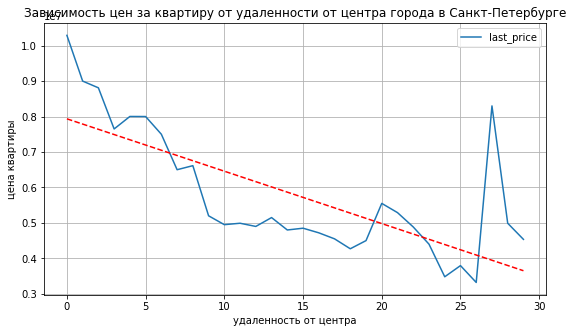

In [91]:
plot2 = spb_city.pivot_table(index= 'center_km', values = 'last_price', aggfunc = 'median')
plot2.plot(grid=True, figsize=(9, 5))
plt.title('Зависимость цен за квартиру от удаленности от центра города в Санкт-Петербурге')
plt.xlabel('удаленность от центра')
plt.ylabel('цена квартиры')
x=plot2.index
y=plot2['last_price']
z=np.polyfit(x,y,1)
p=np.poly1d(z)
plt.plot(x,p(x),'r--')
plt.show()

По мере отдаления от центра города, цена квартир опускается. Единственное мы можем заметить скачок цены на расстоянии от 25 до 30 км.

In [92]:
spb_city.pivot_table(index= 'center_km', values = 'last_price', aggfunc = 'median')

,last_price
center_km,
0.0,10290000.0
1.0,9000000.0
2.0,8810000.0
3.0,7650000.0
4.0,8001805.0
5.0,8000000.0
6.0,7500000.0
7.0,6500000.0
8.0,6614250.0


Смотря на таблицу мы можем наблюдать что средняя стоимость квартир в центре Санкт-Петербурга равна 7,6 млн. И чем дальше от центра тем меньше. В 29 км от центра квартира стоит в среднем 4,37 млн. Так же мы видим что скачок цены произошел на расстоянии в 28 км.

### Общий вывод

В данном проекте мы изучили данные о продажах квартир в Санкт-Петербурге и близлежащих поселениях. В данных содержалась информация о характеристиках продаваемых квартир: площадь, цена, количество комнат, этаж, высота потолков, расстояние до центра города, дата создания объявления и т.д.

На стадии предобработки данных столкнулись с отсутствием данных в некоторых столбцах. Там, где уместно данные были заполнены, остальные пропуски оставили, так как подходящих значений для замены нет. Было выявлено что основная часть пропущенных значений приходится на данные, которые были получены автоматически.

Добавили необходимые для исследования данные: рассчитали стоимость за квадратный метр, добавили столбцы с днем недели, месяцем и годом публикации объявления. Затем изучили определенные параметры, по каждому из которых построили гистограмму. И на основе полученных выводов о данных убрали редкие и выбивающиеся значения.

И наконец провели анализ объявлений о продаже квартир в Санкт-Петербурге и близлежащих городов. Рассмотрели влияние на стоимость различных факторов (площадь, высота потолков, количество комнат, этаж, дата размещения, удаленность от центра). Затем выделили сегмент квартир в центре Санкт-Петербурга и сравнили влияние удаленности от центра на их стоимость.

В ходе исследования выяснили, что на цену квартиры влияет множество факторов. Можно сделать следующие основные выводы:

1. При увеличении площади и следовательно количества комнат увеличивается стоимость квартиры, что вполне логично. Однако, чем больше квартира по площади, тем дешевле цена за квадратный метр.
2. День недели на стоимость не влияет. Но наибольшее количество объявлений создаются в будние дни.
3. Самые дорогие квартиры продавали в 2014-2015 году, а вот цена за квадратный метр наоборот в последние годы растет. Наиболее высокая стоимость у квартир, объявление которых было создано в декабре, а в июне заметно значительное понижение цен.